<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/TwoSpirals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/8.twospirals.csv",header=None)

In [ ]:
data.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


No null values

In [ ]:
data[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

Balanced data

In [ ]:
data.shape

(2000, 3)

In [ ]:
y = y.astype(int) #need output in int for comparision

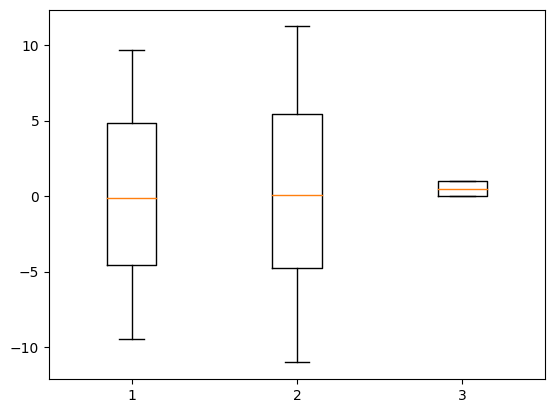

In [ ]:
plt.boxplot(data)
plt.show()

No Outliers

In [ ]:
x = data[[0,1]]
y = data[2]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=33)

In [ ]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1600, 2), (400, 2), 1600, 400)

In [ ]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

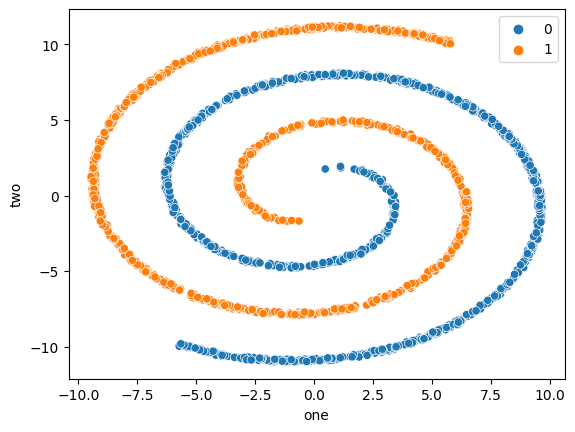

In [ ]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [ ]:
model = Sequential()
model.add(Dense(4,activation="tanh",input_dim=2))
model.add(Dense(2,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 4)                 12        
                                                                 
 dense_55 (Dense)            (None, 2)                 10        
                                                                 
 dense_56 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


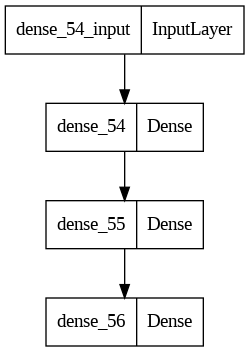

In [ ]:
plot_model(model)

In [ ]:
model.layers[0].get_weights()

[array([[ 0.62715864,  0.01575041,  0.29843402, -0.46072054],
        [-0.12535071, -0.13585806,  0.21290898, -0.92941856]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [ ]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,batch_size=10,epochs=500,validation_split=0.2)

Epoch 1/500
128/128 [==============================] - 1s 5ms/step - loss: 0.6325 - accuracy: 0.6695 - val_loss: 0.6394 - val_accuracy: 0.6375
Epoch 2/500
128/128 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6680 - val_loss: 0.6399 - val_accuracy: 0.6469
Epoch 3/500
128/128 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.6773 - val_loss: 0.6394 - val_accuracy: 0.6438
Epoch 4/500
128/128 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6766 - val_loss: 0.6414 - val_accuracy: 0.6469
Epoch 5/500
128/128 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6773 - val_loss: 0.6383 - val_accuracy: 0.6469
Epoch 6/500
128/128 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6695 - val_loss: 0.6381 - val_accuracy: 0.6500
Epoch 7/500
128/128 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.6711 - val_loss: 0.6393 - val_accuracy: 0.6406

In [ ]:
model.layers[0].get_weights()

[array([[ 1.9400526 ,  1.1772133 ,  2.6244156 ,  0.35675243],
        [ 0.6429986 , -0.9411577 , -0.7195588 , -1.9709084 ]],
       dtype=float32),
 array([-1.3437198 ,  1.397213  , -3.7987869 , -0.36170453], dtype=float32)]

In [ ]:
predict = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [ ]:
predict = np.where(predict>0.5,1,0)

In [ ]:
accuracy_score(y_test,predict)

0.8475

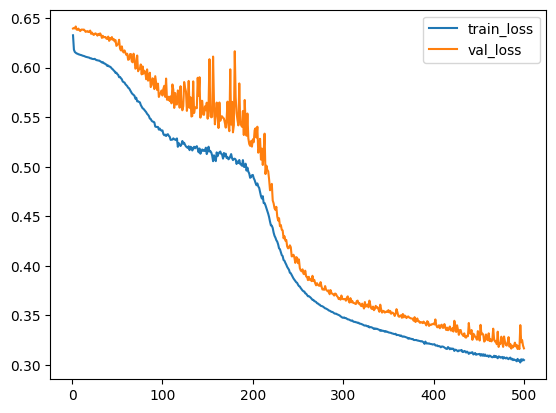

In [ ]:
plt.plot(range(1,501),history.history["loss"],label="train_loss")
plt.plot(range(1,501),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

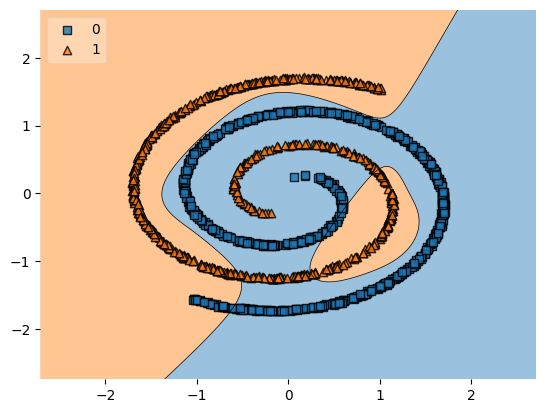

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

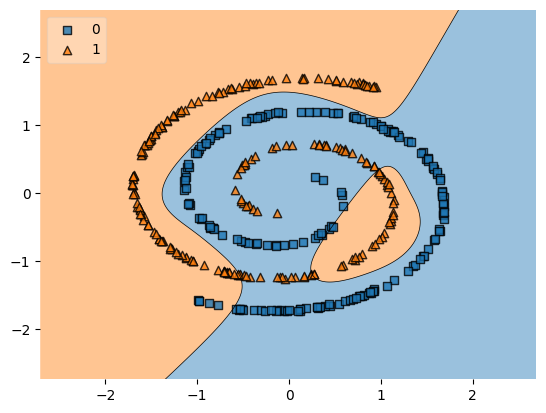

In [ ]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)